# Pandas Analyse de Données du Titanic

In [1]:
# IMPORTER LES BIBLIOTHEQUES NECESSAIRES
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Créer le DataFrame
data_frame = pd.read_excel("titanic3.xls")

### Analyse de données

In [3]:
# Vérifier la dimension du DataFrame
data_frame.shape

(1309, 14)

In [4]:
# Afficher les 10 1èrs éléments du DataFrame 
data_frame.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [5]:
# Supprimer quelques colonnes
data_frame = data_frame.drop(["name", "sibsp", "parch", "ticket", "fare", "cabin", "body", "embarked", "boat", "home.dest"], axis=1)

In [6]:
# Afficher la tête du DataFrame
data_frame.head()

,pclass,survived,sex,age
0,1,1,female,29.0000
1,1,1,male,0.9167
2,1,0,female,2.0000
3,1,0,male,30.0000
4,1,0,female,25.0000


In [7]:
# Voir la description du DataFrame
# La fonction "describe()" produit les statistiques de base pour chaque colonne ayant uniquement des valeurs numériques
data_frame.describe()

,pclass,survived,age
count,1309.000000,1309.000000,1046.000000
mean,2.294882,0.381971,29.881135
std,0.837836,0.486055,14.413500
min,1.000000,0.000000,0.166700
25%,2.000000,0.000000,21.000000
50%,3.000000,0.000000,28.000000
75%,3.000000,1.000000,39.000000
max,3.000000,1.000000,80.000000


In [8]:
# En Data Sciene la donnée est l'or:
# Donc lorsqu'il nous manque certaines données dans le Dataset chargé, on peut procéder comme suit:
# Avec des lignes ne contenant aucune donnée, le mieux serait d'éliminer toutes les lignes ayant des données manquantes
data_frame = data_frame.dropna(axis=0)

In [9]:
# La nouvelle taille de notre DataFrame après suppression des valeurs dites "NaN" devient:
data_frame.shape

(1046, 4)

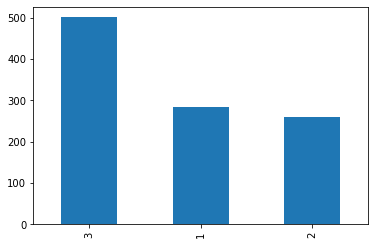

In [10]:
# Afficher la classe de chaque passager dans un graphique
# Pandas focntionne en étroite collaboration avec matplotlib en utilisant matplotlib.pyplot
data_frame["pclass"].value_counts().plot.bar()
plt.show()

In [11]:
# Grouper les gens selon leur caractéristiques : "sexe", "age" ou "classe" en faisant leur statistiques : moyenne, écartype etc.
data_frame.groupby(["sex", "pclass"]).mean()

survived        age
sex    pclass                     
female 1       0.962406  37.037594
       2       0.893204  27.499191
       3       0.473684  22.185307
male   1       0.350993  41.029250
       2       0.145570  30.815401
       3       0.169054  25.962273

### L'envers du Décor

#### Dans Pandas il existe 2 structures de données :
##### 1. Séries : Une série est une colonne dans un DataFrame, c'est un tableau numpy à 1D + l'axe d'index
##### 2. DataFrames : C'est un dictionnaire contenant des séries 

In [12]:
# Afficher l'âge des 10 1èrs passagers du Titanic
data_frame["age"][0:10]

0    29.0000
1     0.9167
2     2.0000
3    30.0000
4    25.0000
5    48.0000
6    63.0000
7    39.0000
8    53.0000
9    71.0000
Name: age, dtype: float64

In [13]:
# Afficher tous les passagers mineurs >
data_frame["age"] < 18

0       False
1        True
2        True
3       False
4       False
        ...  
1301    False
1304     True
1306    False
1307    False
1308    False
Name: age, Length: 1046, dtype: bool

In [14]:
# Afficher les classes de tous les passagers mineurs
data_frame[data_frame["age"] < 18]["pclass"].value_counts()

3    106
2     33
1     15
Name: pclass, dtype: int64

In [15]:
# Afficher la moyenne de chaque passager  mineur selon son sexe et la classe dans laquelle il voyageait
data_frame[data_frame["age"] < 18].groupby(["sex", "pclass"]).mean()

survived        age
sex    pclass                     
female 1       0.875000  14.125000
       2       1.000000   8.273150
       3       0.543478   8.416667
male   1       0.857143   9.845243
       2       0.733333   6.222220
       3       0.233333   9.838888

In [16]:
# Indexing avec Pandas
# En utilisant les fonctions "iloc()" pour index location et "loc" pour location qui travaille uniquement avec des colonnes

# Utilisation de "iloc()"
data_frame.iloc[0:2, 0:2]

,pclass,survived
0,1,1
1,1,1


In [17]:
# Utilisation de "loc()"
data_frame.loc[0:2,["age", "sex"]]

,age,sex
0,29.0000,female
1,0.9167,male
2,2.0000,female


### EXERCICES

### Partie 1 : Feature Engineering

#### Modifier la colonne "age" afin de créer 4 catégories :
#### 1. Cat0: < 20 ans 
#### 2. Cat1: 20 - 30 ans 
#### 3. Cat2: 30 - 40 ans
#### 4. Cat3: + 40 ans

### METHODE SIMPE

In [18]:
# Catégorie 0 :
data_frame.loc[data_frame["age"] <= 20, "age"] = 0

# Catégorie 1:
data_frame.loc[(data_frame["age"] > 20) & (data_frame["age"]<= 30), "age"] = 1

# Catégorie 2:
data_frame.loc[(data_frame["age"] > 30) & (data_frame["age"] <= 40), "age"] = 2

# Catégorie 3:
data_frame.loc[data_frame["age"] > 40, "age"] = 3

In [19]:
data_frame.head()

,pclass,survived,sex,age
0,1,1,female,1.0
1,1,1,male,0.0
2,1,0,female,0.0
3,1,0,male,1.0
4,1,0,female,1.0


In [20]:
data_frame["age"].value_counts()

1.0    361
0.0    248
3.0    227
2.0    210
Name: age, dtype: int64

In [21]:
data_frame.groupby(["age"]).mean()

,pclass,survived
age,,
0.0,2.568548,0.459677
1.0,2.371191,0.371191
2.0,2.109524,0.423810
3.0,1.643172,0.396476


### RESOUDRE AVEC LES FONCTIONS "MAP()" et "APPLY()"
#### La fonction 'map()' applique une fonction sur chaque élément d'une colonne
#### La fonction "apply()" applique une fonction sur chaque élément du DataFrame

In [22]:
# Définir une fonction qui régroupe toutes les catégories d'ages selon la catégorie donnée
def categorie_ages(age):
    if age <= 20:
        return "< 20 ans"
    elif (age > 20) and (age <= 30):
        return "20-30 ans"
    elif (age > 30) and (age <= 40):
        return "30-40 ans"
    else:
        return "+ 40 ans"

In [23]:
# Appliquer la fonction categorie_ages() sur la fonction "map()"
data_frame["age"].map(categorie_ages)

0       < 20 ans
1       < 20 ans
2       < 20 ans
3       < 20 ans
4       < 20 ans
          ...   
1301    < 20 ans
1304    < 20 ans
1306    < 20 ans
1307    < 20 ans
1308    < 20 ans
Name: age, Length: 1046, dtype: object

In [24]:
# Ajouter + 1 à la colonne "age" en créeant une fonction anonyme, lambda x: x+1
data_frame["age"].map(lambda x: x+1)

0       2.0
1       1.0
2       1.0
3       2.0
4       2.0
       ... 
1301    4.0
1304    1.0
1306    2.0
1307    2.0
1308    2.0
Name: age, Length: 1046, dtype: float64

### Transformer des catégories en données Numériques

In [25]:
# 1. Avec la fonction map()
data_frame["sex"].map({"male":0, "female":1})

0       1
1       0
2       1
3       0
4       1
       ..
1301    0
1304    1
1306    0
1307    0
1308    0
Name: sex, Length: 1046, dtype: int64

In [26]:
# 2. Avec la méthode replace() et c'est très explicite, car on va remplacer les éléments de la 1ere par celles de la 2nde liste
data_frame["sex"].replace(["male", "female"], [0, 1])

0       1
1       0
2       1
3       0
4       1
       ..
1301    0
1304    1
1306    0
1307    0
1308    0
Name: sex, Length: 1046, dtype: int64

In [27]:
# 3. Utiliser la méthode des codes de catégorie
# .cat.code a pour effet de convertir les différentes catégories en valeurs Numériques
# Cette technique devient plus utile que les autres dans le cas où on a beaucoup de type de catégorie différents,
# Par exemple le dataset sur la sécurité routière qui contient plusieurs catégories de véhicules, des motos, des voitures, des camions, des camionnettes, des remorques
# Alors qu'en utilisant map() et replace() en aura a expliciter chaque catégorie, ce qui prend beaucoup plus de temps  
data_frame["sex"].astype("category").cat.codes

0       0
1       1
2       0
3       1
4       0
       ..
1301    1
1304    0
1306    1
1307    1
1308    1
Length: 1046, dtype: int8

# TimeSeries et Bitcoin

In [2]:
# Remplacer la colonne d'index avec celle des dates en faisant : index_col="Date"
# Indiquer que la colonne "Date" doit être traitée comme une date en faisant: parse_dates=True
# Tout ceci est fait afin de travailler sur une base temporelle
bitcoin = pd.read_csv("BTC-EUR.csv", index_col="Date", parse_dates=True)

In [21]:
bitcoin.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-09-18,9253.401367,9316.917969,9240.340820,9246.486328,9246.486328,1.466026e+10
2019-09-19,9248.524414,9319.454102,8917.574219,9292.973633,9292.973633,1.804724e+10
2019-09-20,9292.886719,9334.069336,9194.604492,9239.483398,9239.483398,1.337076e+10
2019-09-21,9241.304688,9245.341797,9075.292969,9092.541992,9092.541992,1.218296e+10
2019-09-22,9096.534180,9142.628906,9004.768555,9138.951172,9138.951172,1.197878e+10


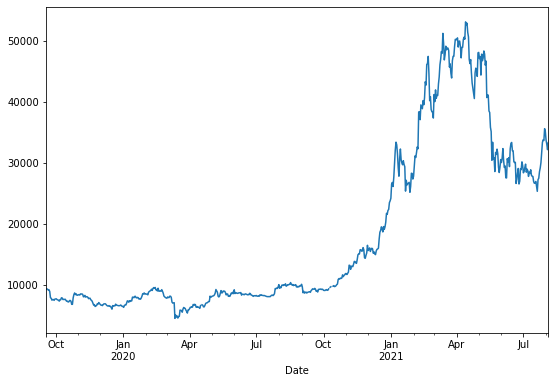

In [22]:
# Charger la colonne "Close" afin de voir son évolution
bitcoin["Close"].plot(figsize=(9, 6))
# Affichage de la figure
plt.show()

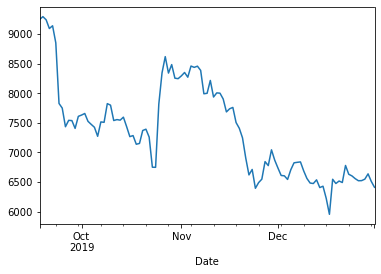

In [23]:
# Observer l'évolution du BTC en 2019
bitcoin.loc["2019"]["Close"].plot()
plt.show()
# On peut aussi utiliser cette méthode: bitcoin["2019"]["Close"], mais celle-ci sera supprimée dans la future version de IPython

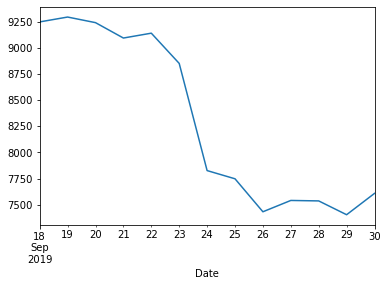

In [24]:
# Evolution du BTC en Semptembre 2019
bitcoin.loc["2019-09"]["Close"].plot()
plt.show()

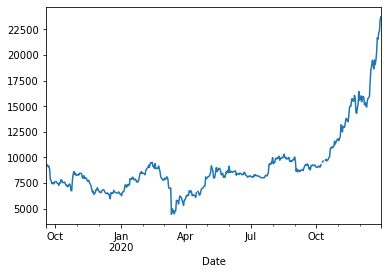

In [25]:
# Faire du sclicing
bitcoin.loc["2018":"2020"]["Close"].plot()
plt.show()

### La fonction "RESAMPLE()", elle permet de regrouper les données selon une fréquence temporelle :
#### Year (Y), Month (M), Week (W), Day (D), Hour (h), Minute (m), Second (s), Millisecond (ms), Microsecond (us), Nanosecond (ns)

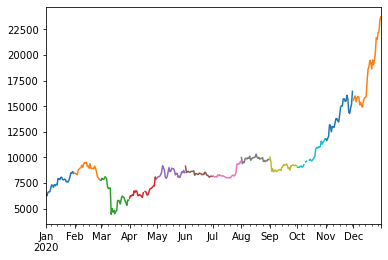

In [26]:
# Afficher l'évolution du BTC en par mois en 2019
bitcoin.loc["2020"]["Close"].resample("M").plot()
plt.show()

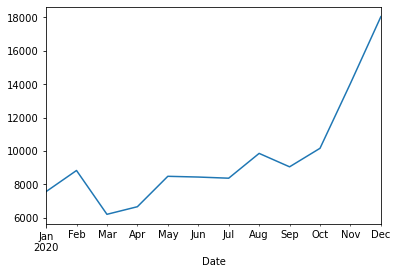

In [27]:
# Qui dit groupe de données dit "Statistique"
# On peut voir la moyenne, l'écart-type, la variance... de chaque mois

# Ici on observe l'évolution de la moyenne du BTC par mois en 2020
bitcoin.loc["2020"]["Close"].resample("M").mean().plot()
plt.show()

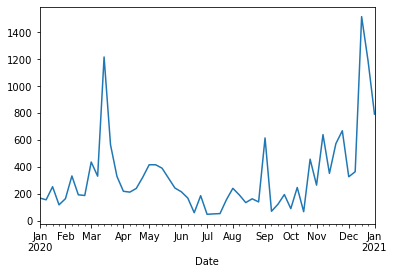

In [28]:
# Evolution du BTC par écart-type en 2020 par semaine
bitcoin.loc["2020"]["Close"].resample("W").std().plot()
plt.show()

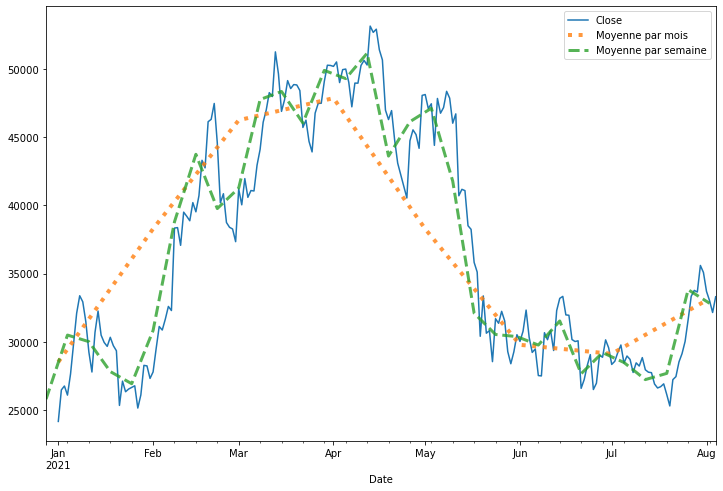

In [29]:
# Creation d'une figure qui va contenir toutes nos sous figures
plt.figure(figsize=(12, 8))
# Afficher l'évolution de la fermeture du BTC en 2021
bitcoin.loc["2021"]["Close"].plot()
# Afficher la moyenne de l'évolution de la fermeture du BTC en 2021 par mois
bitcoin.loc["2021"]["Close"].resample("M").mean().plot(label="Moyenne par mois", lw=4, ls=":", alpha=0.8)
# Afficher la moyenne de l'évolution de la fermeture du BTC en 2021 par semaine
bitcoin.loc["2021"]["Close"].resample("W").mean().plot(label="Moyenne par semaine", lw=3, ls="--", alpha=0.8)
# Appliquer la légende
plt.legend()
# Afficher la figure
plt.show()

### La fonction "AGGREGATE", elle permet de rassembler dans un seul tableau toutes les statistiques voulues par dessus "RESAMPLE"

In [30]:
bitcoin.loc["2020"]["Close"].resample("W").agg(["mean", "std", "var", "min", "max"])

,mean,std,var,min,max
Date,,,,,
2020-01-05,6506.759375,168.691930,2.845697e+04,6252.938477,6640.674316
2020-01-12,7223.390276,155.490263,2.417722e+04,6939.714844,7369.640137
2020-01-19,7848.336984,252.597230,6.380536e+04,7313.747070,8063.265625
2020-01-26,7737.987932,118.117323,1.395170e+04,7589.612793,7889.409180
2020-02-02,8425.291225,163.802258,2.683118e+04,8085.500488,8621.291016
2020-02-09,8787.688058,332.534423,1.105791e+05,8311.948242,9238.546875
2020-02-16,9302.165737,192.484132,3.705014e+04,9034.057617,9521.362305
2020-02-23,9021.720285,187.451016,3.513788e+04,8906.883789,9395.312500
2020-03-01,8140.478236,436.081386,1.901670e+05,7748.164551,8895.318359


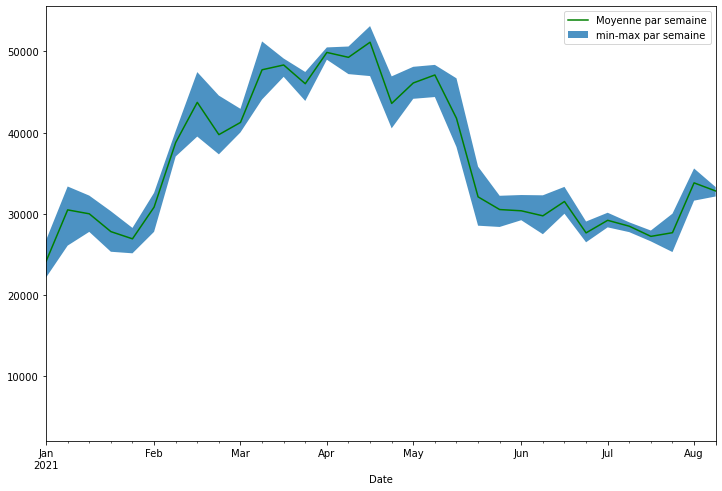

In [34]:
# Enregistrer le tableau aggregate dans une variable "m"
m = bitcoin["Close"].resample("W").agg(["mean", "std", "min", "max"])

# Créer un graphique
plt.figure(figsize=(12, 8))
# Afficher la moyenne par semaine en 2020
m["mean"]["2021"].plot(label="Moyenne par semaine", c="g")
# Créer une zone d'incertitude avec la fonction "fill_between()" de matplotlib entre le minimum et le maximum pour chaque semaine
plt.fill_between(m.index, m["max"], m["min"], alpha=0.8, label="min-max par semaine")

# Afficher la légende
plt.legend()
plt.show()

### MOVING AVERAGE
### C'est une technique qui permet de calculer une moyenne sur une fenêtre de valeurs plutôt que de calculer la moyenne de toutes les valeurs et on peut définir cette fonction roulante avec la fonction "pd.rolling(window)"

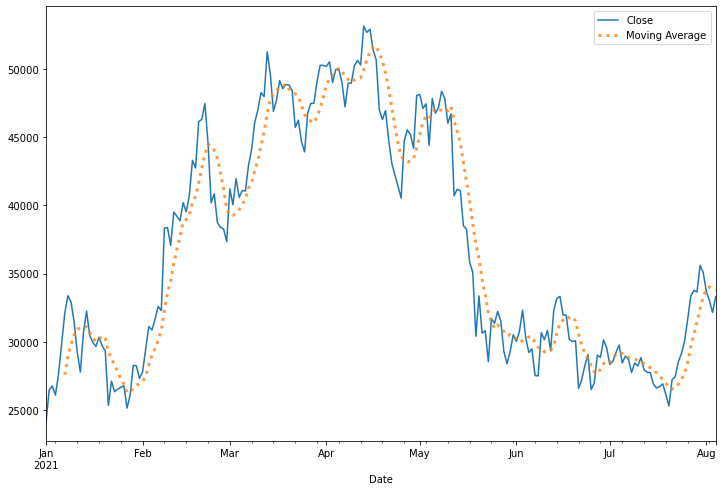

In [32]:
plt.figure(figsize=(12, 8))
bitcoin.loc["2021"]["Close"].plot()
# On prend une fenêtre de 7 jours
bitcoin.loc["2021"]["Close"].rolling(window=7).mean().plot(label="Moving Average", lw=3, ls=":", alpha=0.8)
plt.legend()
plt.show()

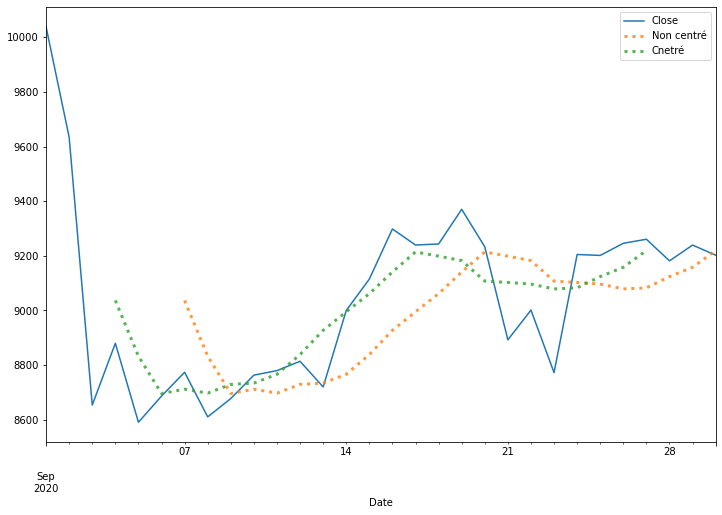

In [33]:
# Afficher les données du mois de Septembre 2020
plt.figure(figsize=(12, 8))
bitcoin.loc["2020-09"]["Close"].plot()
# Par défaut, "center" = "False"
bitcoin.loc["2020-09"]["Close"].rolling(window=7).mean().plot(label="Non centré", lw=3, ls=":", alpha=0.8)
# Placer la moyenne au milieu de la fenêtre
bitcoin.loc["2020-09"]["Close"].rolling(window=7, center=True).mean().plot(label="Centré", lw=3, ls=":", alpha=0.8)
plt.legend()
plt.show()

### LA FONCTION EXPONENTIAL WEIGHTED

![](EWM.png)

### x ̅_t=∑_(n=0)^∞▒α (1 - α)^n x_(t-n)
####  Une moyenne mobile exponentielle est donnée par la formule suivante:
#### xt = α(xt + (1 - α)xt-1 + (1 - α)²xt-2 + (1 - α)^3xt-3 + ...)
#### Avec xt : la valeur de x à l'instant t
#### et alpha: le facteur de lissage (0 < α < 1), est compris entre 0 et 1
#### "Les valeurs perdent peu a peu du poids avec le temps"
Etant donné que la fonction rolling() n'est pas trop efficace, on peut utiliser la fonction "exp weighted "

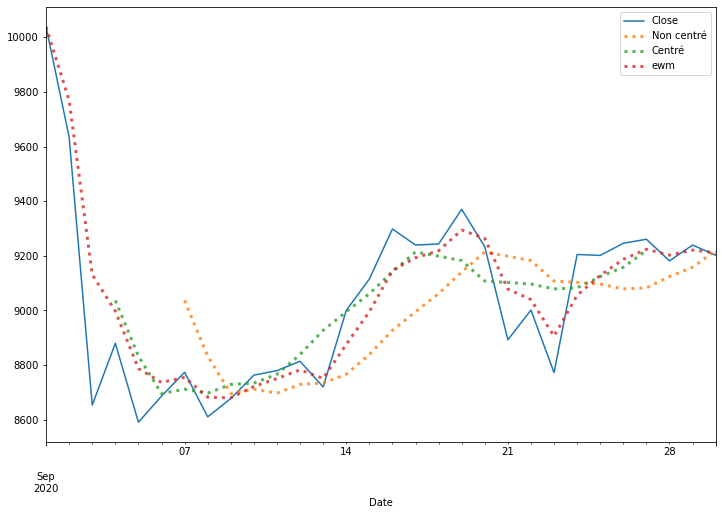

In [36]:
# Afficher les données du mois de Septembre 2020
plt.figure(figsize=(12, 8))
bitcoin.loc["2020-09"]["Close"].plot()
# Par défaut, "center" = "False"
bitcoin.loc["2020-09"]["Close"].rolling(window=7).mean().plot(label="Non centré", lw=3, ls=":", alpha=0.8)
# Placer la moyenne au milieu de la fenêtre
bitcoin.loc["2020-09"]["Close"].rolling(window=7, center=True).mean().plot(label="Centré", lw=3, ls=":", alpha=0.8)
bitcoin.loc["2020-09"]["Close"].ewm(alpha=0.5).mean().plot(label="ewm", lw=3, ls=":", alpha=0.8)
plt.legend()
plt.show()

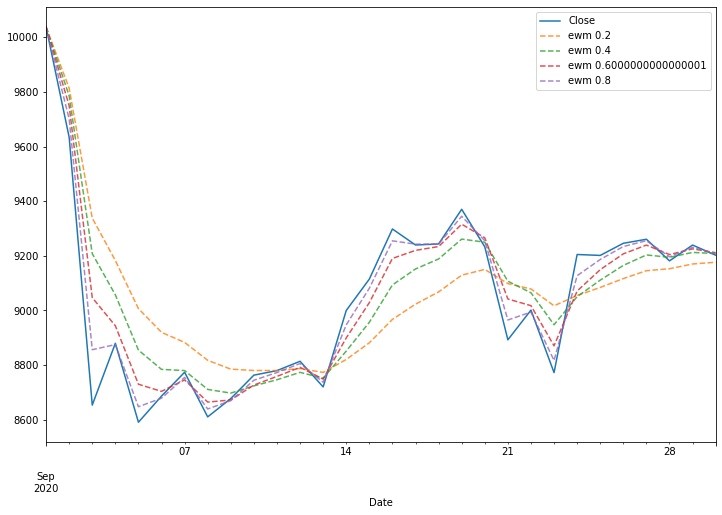

In [37]:
plt.figure(figsize=(12, 8))
bitcoin.loc["2020-09"]["Close"].plot()

# Afficher le graphique contenant la fonction "ewm" dans un tableau "numpy"
# On itère les valeurs comprises entre 0.2 et 1 et les inclure dans la fonction "ewm"
# Afficher les valeurs itérées dans le "alpha" pui formater cela dans la légende
for i in np.arange(0.2, 1, 0.2):
    bitcoin.loc["2020-09"]["Close"].ewm(alpha=i).mean().plot(label=f"ewm {i}", ls="--", alpha=0.8)
plt.legend()
plt.show()

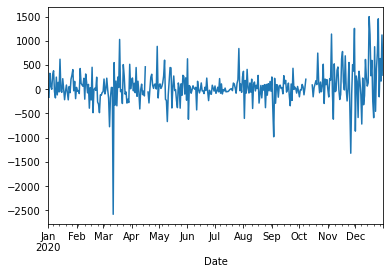

In [67]:
# Observer les variations au jour le jour d'une crypto monnaie
# Le cas de la crypto monaie Bitcoin
bitcoin.loc["2020"]["Close"].diff().plot()
plt.show()

## ASSEMBLER LES DATASETS BTC vs ETH
### Différentes façons d'assemblage :
### how="inner" : Assemblage par Intersection
### how="outer" : Assemblage par Union
### how="left"     : Assemblage à gauche
### how="right"  : Assemblage à droite

In [10]:
# Importer le Dataset Ethereum
ethereum = pd.read_csv("ETH-EUR.csv", index_col="Date", parse_dates=True)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

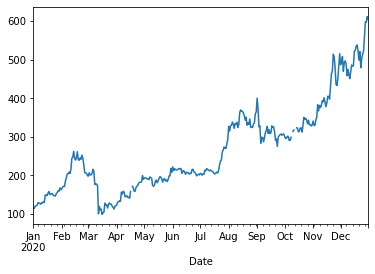

In [40]:
ethereum.loc["2020"]["Close"].plot()
plt.show()

In [12]:
# Essaie de joindre les data sets sur +plusieurs colonnes
BTC_ETH = pd.merge(bitcoin, ethereum, on=("Date", "Open", "Volume"),how="inner", suffixes=("_BTC","_ETH"))
BTC_ETH.columns

Index(['Open', 'High_BTC', 'Low_BTC', 'Close_BTC', 'Adj Close_BTC', 'Volume',
       'High_ETH', 'Low_ETH', 'Close_ETH', 'Adj Close_ETH'],
      dtype='object')

In [9]:
# ASSEMBLAGE DE DES DATASETS BTC ET ETH
# L'assemblage se fait sur la colonne qu'ils ont en commun et ici on utilise la colonne "Date"
# On change les suffixes de défaut par ceux correspondants : btc et eth
btc_eth = pd.merge(bitcoin, ethereum, on="Date", how="inner", suffixes=("_btc","_eth"))
# Avec "inner" l'assemblage se fait sur les indexes qu'ils ont en commun et le reste est ignoré (mis à la poubelle)

Index(['Open_btc', 'High_btc', 'Low_btc', 'Close_btc', 'Adj Close_btc',
       'Volume_btc', 'Open_eth', 'High_eth', 'Low_eth', 'Close_eth',
       'Adj Close_eth', 'Volume_eth'],
      dtype='object')

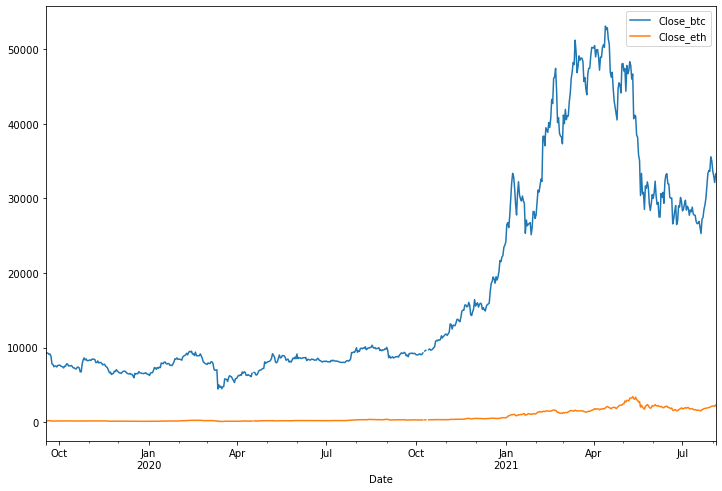

In [46]:
btc_eth[["Close_btc", "Close_eth"]].plot(figsize=(12, 8))
plt.show()

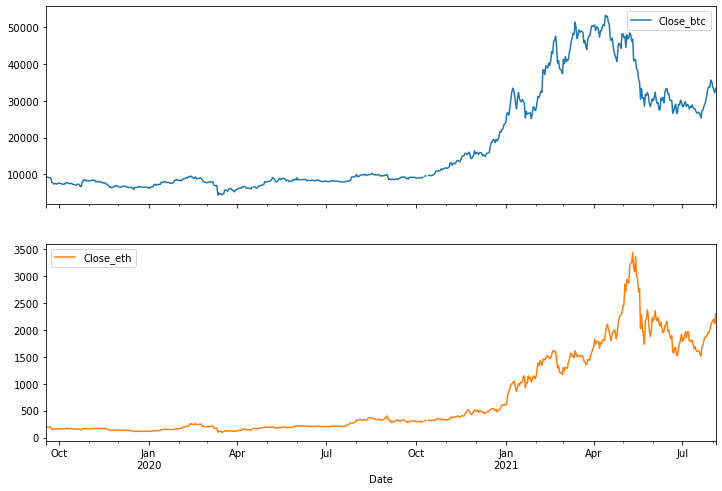

In [51]:
# On observe les deux cryptos ne partagent pas la même échelle pour cela,
# nous allons créer des subplots à l'interieur de plot sur une même figure
btc_eth[["Close_btc", "Close_eth"]].plot(subplots=True, figsize=(12, 8))
plt.show()

In [52]:
# Etant donné que les deux cryptos soient bien correlées, on va calculer cette correlation
# Et l'on obtient une matrice de correlation dans "pandas"
btc_eth[["Close_btc", "Close_eth"]].corr()

,Close_btc,Close_eth
Close_btc,1.000000,0.897473
Close_eth,0.897473,1.000000


#### Observer ces correlations ainsi que d'autres dans un graphique

In [58]:
correlations = btc_eth[["Close_btc", "Close_eth"]]["2020-09"].corr()

<ipython-input-58-560c8d1e62e1>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  correlations = btc_eth[["Close_btc", "Close_eth"]]["2020-09"].corr()


In [59]:
# Pour observer ces correlations on utilise la librairie "seaborn"
import seaborn as sns

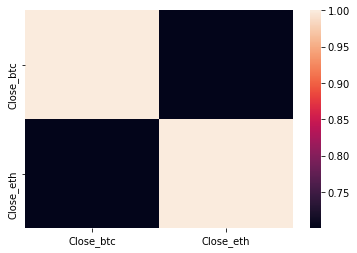

In [60]:
sns.heatmap(correlations)
plt.show()

# Exercice 
## Partie 2 : Trading Strategy

### Mettre en place la stratégie de la tortue "Turtle Strategy"  qui est une vielle technique de Trading afin de decider quand vendre ou achter du BTC en fonction de la valeur de "Close" par rapport au minimum ou au maximum des 28 derniers jours

### Comment procéder ?
#### 1. Utiliser rolling() pour calculer : 
####     - max sur les 28 derniers jours
####     - min sur les 28 derniers jours
#### 2. Boolean Indexing : 
####     - si "Close" > max28 alors Buy = 1
####     - si "Close" <  min28 alors Sell = -1

#### INDICE: Initialiser des colonnes "Buy" et "Sell" avec des 0: 
#### bitcoin["Buy"] = np.zeros(len(bitcoin))
#### bitcoin["Sell"] = np.zeros(len(bitcoin))